In [1]:
# Importing Liabriaries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the dataframe

df = pd.read_csv(r"apple_quality.csv", header=0, index_col=0)
df.head(5)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
A_id,,,,,,,,
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


### Basic preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 281.2+ KB


In [4]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [5]:
df.shape

(4000, 8)

In [6]:
df.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [7]:
df.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [8]:
df.dtypes

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

In [9]:
df["Quality"].value_counts()

good    2004
bad     1996
Name: Quality, dtype: int64

### Data Visualisation

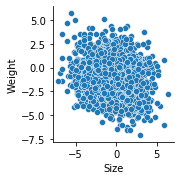

In [10]:
sns.pairplot(x_vars="Size",
            y_vars= "Weight",
            data= df)
plt.show()

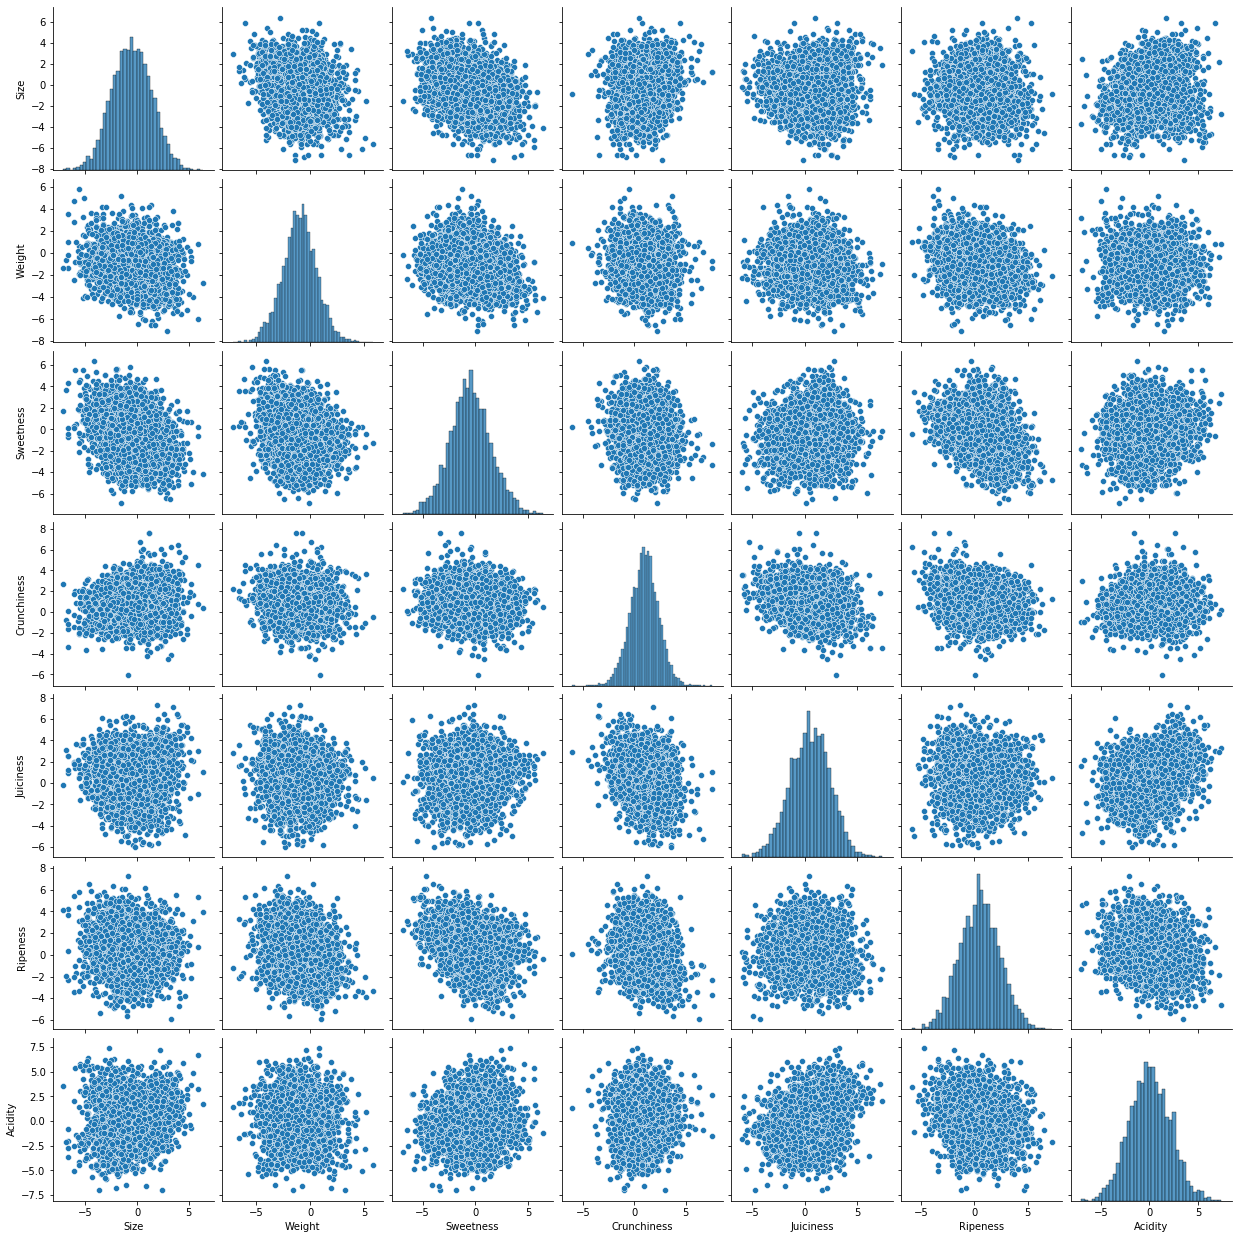

In [11]:
sns.pairplot(data= df)
plt.show()

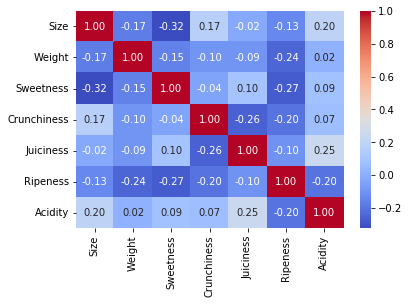

In [12]:
# Compute the correlation matrix
corr = df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Quality']].corr()

# Generate a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Quality"] = le.fit_transform(df["Quality"])

In [14]:
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
A_id,,,,,,,,
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


In [15]:
# Creating X and Y

X = df.values[:,0:-1]
Y = df.values[:,-1]
Y = Y.astype(int)

In [16]:
print(X.shape)
print(Y.shape)

(4000, 7)
(4000,)


### Scaling the data

In [17]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# scaler.fit(X)

# X = scaler.transform(X)

In [18]:
# print(X)

### Splitting the data into Train and Test

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2800, 7)
(1200, 7)
(2800,)
(1200,)


### Running the Basic Decision tree model

In [21]:
from sklearn.tree import DecisionTreeClassifier

#creating a model object
model_DT = DecisionTreeClassifier(random_state=10, criterion="gini")

#training the data on Model object
model_DT.fit(X_train, Y_train)

#predicting on test data
y_pred = model_DT.predict(X_test)
print(y_pred)

[0 1 1 ... 0 1 0]


In [22]:
print(list(zip(Y_test, y_pred)))

[(0, 0), (1, 1), (0, 1), (1, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (1, 0), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0),

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(Y_test, y_pred))
print()
print(accuracy_score(Y_test, y_pred))
print()
print(classification_report(Y_test, y_pred))

[[498 147]
 [106 449]]

0.7891666666666667

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       645
           1       0.75      0.81      0.78       555

    accuracy                           0.79      1200
   macro avg       0.79      0.79      0.79      1200
weighted avg       0.79      0.79      0.79      1200



#### In the confusion matrix:

- The first row represents the instances of the actual class 0.
- The second row represents the instances of the actual class 1.
- The first column represents the instances predicted as class 0.
- The second column represents the instances predicted as class 1.

#### From this confusion matrix:

- 498 instances of class 0 were correctly predicted as class 0.
- 147 instances of class 0 were incorrectly predicted as class 1.
- 106 instances of class 1 were incorrectly predicted as class 0.
- 449 instances of class 1 were correctly predicted as class 1.

#### Accuracy:
    
- Accuracy measures the proportion of correct predictions out of the total predictions made. In this case, the accuracy is approximately 0.789 or 78.9%.
    
#### Classification Report:
    
- The classification report provides precision, recall, and F1-score for each class (0 and 1), along with the support (number of occurrences) for each class and the average values.

- Precision: It measures the accuracy of positive predictions. For class 0, precision is 0.82, and for class 1, precision is 0.75.
- Recall: It measures the proportion of actual positives that are correctly identified by the model. For class 0, recall is 0.77, and for class 1, recall is 0.81.
- F1-score: It is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0, F1-score is 0.80, and for class 1, F1-score is 0.78.
- Support: It represents the number of occurrences of each class in the true dataset.
    
- The macro avg and weighted avg are the averages for each metric across all classes. In this case, they are both approximately 0.79.

In [24]:
model_DT.score(X_train, Y_train)

1.0

In [25]:
model_DT.feature_importances_   # to measure the importance of each variable

array([0.19180477, 0.09731165, 0.15343075, 0.09813863, 0.15298278,
       0.18856601, 0.11776541])

In [26]:
print(list(zip(df.columns[0:-1],model_DT.feature_importances_)))

[('Size', 0.1918047709448686), ('Weight', 0.09731165308709241), ('Sweetness', 0.15343075024552397), ('Crunchiness', 0.09813862723245655), ('Juiciness', 0.1529827803709412), ('Ripeness', 0.1885660081043696), ('Acidity', 0.1177654100147476)]


In [27]:
sample=pd.DataFrame()
 
sample["Column"]=df.columns[0:-1]
sample["Imp value"]=model_DT.feature_importances_
 
sample.sort_values("Imp value",ascending=False)

,Column,Imp value
0,Size,0.191805
5,Ripeness,0.188566
2,Sweetness,0.153431
4,Juiciness,0.152983
6,Acidity,0.117765
3,Crunchiness,0.098139
1,Weight,0.097312


#### Using LogisticRegression model

In [28]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train, Y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)

[1 1 0 ... 0 1 0]


In [29]:
print(list(zip(Y_test,Y_pred)))

#Y_test --> actual value, Y_pred --> values predicted by LogR model

print(list(zip(df.columns[:-1], classifier.coef_.ravel()))) #ravel()-> to cconvert 2D array to 1D array
# to guess the percent probability of each variable it takes wheather it will increase or decrease value from 0 to 1.


[(0, 1), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (1, 1), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (1, 1), (1, 0), (1, 1), (0, 1), (0, 1), (0, 0), (1, 1), (1, 1), (0, 1), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 1), (0, 1), (0, 1), (0, 0), (1, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 1), (0, 1), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (1, 0), (0, 1), (1, 0), (1, 1), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 0), (1, 1), (0, 0), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 1), (1, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 1), (1, 1), (0, 0), (1, 1), (1, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 1), (0, 1), (0, 1), (0, 0), (1, 0), (0, 0), (0, 1), (0, 0),

## Evaluating the model
#### Confusion matrix, Accuracy Score, Classification report

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(Y_test, y_pred))
print()
print(accuracy_score(Y_test, y_pred))
print()
print(classification_report(Y_test, y_pred))

[[498 147]
 [106 449]]

0.7891666666666667

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       645
           1       0.75      0.81      0.78       555

    accuracy                           0.79      1200
   macro avg       0.79      0.79      0.79      1200
weighted avg       0.79      0.79      0.79      1200



## Adjusting the Thresold

In [31]:
#store the predicted proabilities

y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.38000802 0.61999198]
 [0.37121577 0.62878423]
 [0.80470885 0.19529115]
 ...
 [0.76034601 0.23965399]
 [0.13409003 0.86590997]
 [0.89431775 0.10568225]]


- For the first sample, the probability of being in the negative class is approximately 0.38, and the probability of being   in the positive class is approximately 0.62.

- For the second sample, the probability of being in the negative class is approximately 0.37, and the probability of being   in the positive class is approximately 0.63.

- For the third sample, the probability of being in the negative class is approximately 0.80, and the probability of being   in the positive class is approximately 0.20.

- And so on for the rest of the samples in your test set.

- These probabilities can be used to make decisions based on your specific threshold or to calculate evaluation metrics       such as ROC-AUC, precision-recall curve, etc.

In [32]:
#thresold value = 0 to 1 -- since its a categorical data 

y_pred_class=[]
for value in y_pred_prob[:,1]:  #taking above array's 2nd columns
    if value > 0.46:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

- This code iterates through the probabilities of the positive class (y_pred_prob[:, 1]) and compares each probability with the threshold value (0.46 in this case). If the probability is greater than the threshold, it predicts class 1; otherwise, it predicts class 0.

- After running this code, y_pred_class will contain the predicted class labels based on the specified threshold value.

In [33]:
#after converting to 0 to 1, passing that value into confusion matrix for evaluation


from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(Y_test, y_pred))
print()
print(accuracy_score(Y_test, y_pred))
print()
print(classification_report(Y_test, y_pred))


# """
# [[498 147]
#  [106 449]]

# 0.7891666666666667

#               precision    recall  f1-score   support

#            0       0.82      0.77      0.80       645
#            1       0.75      0.81      0.78       555

#     accuracy                           0.79      1200
#    macro avg       0.79      0.79      0.79      1200
# weighted avg       0.79      0.79      0.79      1200
# """


[[498 147]
 [106 449]]

0.7891666666666667

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       645
           1       0.75      0.81      0.78       555

    accuracy                           0.79      1200
   macro avg       0.79      0.79      0.79      1200
weighted avg       0.79      0.79      0.79      1200



In [34]:
#checking thresold value from 0.4 to 0.60

for a in np.arange(0.4,0.61,0.01):  #0.4 start range, 0.61 minus one(0.60) end range,  0.0.1 iterator
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]  #FP+FN on confusion matrix
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 335  , type 2 error : 81  , type 1 error: 254
Errors at threshold  0.41000000000000003 : 330  , type 2 error : 84  , type 1 error: 246
Errors at threshold  0.42000000000000004 : 327  , type 2 error : 88  , type 1 error: 239
Errors at threshold  0.43000000000000005 : 322  , type 2 error : 92  , type 1 error: 230
Errors at threshold  0.44000000000000006 : 317  , type 2 error : 96  , type 1 error: 221
Errors at threshold  0.45000000000000007 : 319  , type 2 error : 102  , type 1 error: 217
Errors at threshold  0.4600000000000001 : 315  , type 2 error : 104  , type 1 error: 211
Errors at threshold  0.4700000000000001 : 312  , type 2 error : 109  , type 1 error: 203
Errors at threshold  0.4800000000000001 : 317  , type 2 error : 119  , type 1 error: 198
Errors at threshold  0.4900000000000001 : 319  , type 2 error : 124  , type 1 error: 195
Errors at threshold  0.5000000000000001 : 318  , type 2 error : 127  , type 1 error: 191
Errors at threshold  0.5100000000000

- This information provides insights into the model's performance at different probability thresholds. 
  Depending on your specific needs and the context of your problem, you can choose an appropriate threshold that balances 
  between type 1 and type 2 errors, or optimize for a specific metric like precision, recall, or F1-score.

In [35]:
from sklearn import metrics
 
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])   # On the basis of multiple thresholds
auc = metrics.auc(fpr,tpr)
 
print(auc)

0.811017529157064


- metrics.roc_curve: This function computes the ROC curve. It takes the true labels (Y_test) and the predicted probabilities of the positive class (y_pred_prob[:, 1]) as input and returns the false positive rates (fpr), true positive rates (tpr), and thresholds used for computing the ROC curve.


- metrics.auc: This function calculates the Area Under the Curve (AUC) score from the ROC curve. It takes the false positive rates (fpr) and true positive rates (tpr) as input and returns the AUC score.


- The AUC score provides a single scalar value representing the overall performance of the binary classification model. In this case, the AUC score is approximately 0.811, indicating a reasonably good model performance. A higher AUC score generally suggests better discrimination between positive and negative classes.

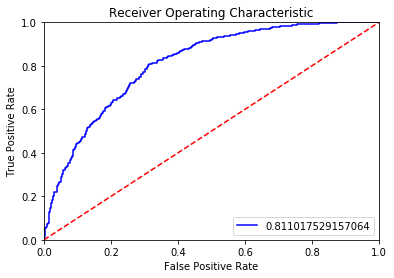

In [36]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.plot(fpr_new,tpr_new, 'green')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
plt.show()

- This plot visualizes the ROC curve, which shows the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity) at different classification thresholds. The AUC value is also included in the legend, providing a summary of the model's performance.

#### AUC on the basis of our fixed threshold

In [37]:
from sklearn import metrics
#y_pred_class is the list of predicted values on the basis of 0.46 threshold
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
 
print(auc)
print(fpr)
print(tpr)

0.7427404148334381
[0.         0.32713178 1.        ]
[0.         0.81261261 1.        ]


- metrics.roc_curve: This function computes the ROC curve. It takes the true labels (Y_test) and the predicted class labels (y_pred_class) as input and returns the false positive rates (fpr), true positive rates (tpr), and thresholds used for computing the ROC curve.

- metrics.auc: This function calculates the Area Under the Curve (AUC) score from the ROC curve. It takes the false positive rates (fpr) and true positive rates (tpr) as input and returns the AUC score.


- The output provides:


- AUC score: Approximately 0.743, indicating the overall performance of the model.
- False Positive Rates (fpr): [0. 0.32713178 1. ]
- True Positive Rates (tpr): [0. 0.81261261 1. ]
- These values represent the points on the ROC curve. The first point (0, 0) represents the performance of the classifier at a threshold where no positive instances are predicted (all predictions are negative). The second point (0.32713178, 0.81261261) represents the performance at the chosen threshold, and the third point (1, 1) represents the performance at a threshold where all instances are predicted as positive.

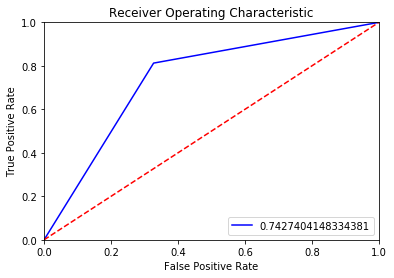

In [38]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.plot(fpr_new,tpr_new, 'green')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
plt.show()